__Regression of Air France Revenue:__

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
from collections import OrderedDict
from matplotlib import cm
# Hierarchical CLustering of OECD Composite Indicator
# Import normalize
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from scipy.stats import kurtosis, skew
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pdb
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mpl.rcParams['figure.figsize'] = 20, 5
mpl.rcParams['lines.linewidth'] = 2
df = pd.read_excel('fpregress.xlsx', parse_dates=['Dates'], index_col='Dates')
data = df_model = df.fillna(method='ffill').fillna(method='bfill').dropna(axis=1)
data.head(40).pct_change().iloc[[0,2,-2,-1],:]

,SALES_REV_TURN,EBITDA,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,SHORT_AND_LONG_TERM_DEBT,REV_PASS_CARRIED,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,CF_FREE_CASH_FLOW,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,,
2001-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-28,-0.093545,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.055926,0.000000,0.004450
2011-09-30,0.088608,1.738095,-3.530965,0.067224,0.003373,-0.014733,-0.008061,-0.055657,-0.034258,0.007088,0.066315,-0.050811,0.0,0.026300,0.100177,-0.003521,0.0,-0.043682,0.181275,0.019261
2011-12-30,-0.110980,-0.722981,-1.642364,-0.053885,-0.016807,-0.150467,0.111634,-0.021359,-0.015213,-0.009196,-0.109215,0.033045,0.0,-0.055329,0.000000,-0.731449,0.0,0.152839,-0.001100,0.013175


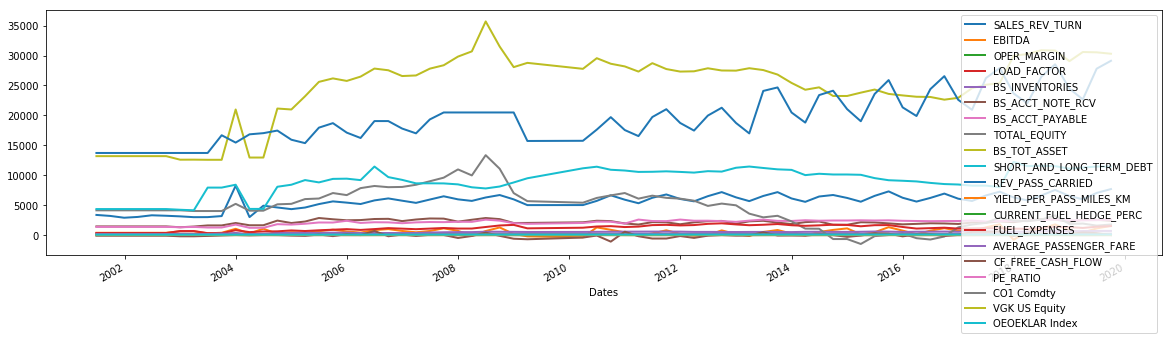

In [3]:
df_model.plot()

In [22]:
y_names = ['EBITDA']

# df_model = df_model.drop(columns='Adj Close')
features_names_model = df_model.columns.drop(y_names).tolist()      

feature_target_df = df_model[y_names + features_names_model].pct_change().dropna()

In [23]:
# Modification of features/target data properties (diff, shift, lag, etc..).
targets = feature_target_df[y_names]
features = feature_target_df[features_names_model]
features.iloc[[0,1,-2,-1],:]

,SALES_REV_TURN,OPER_MARGIN,LOAD_FACTOR,BS_INVENTORIES,BS_ACCT_NOTE_RCV,BS_ACCT_PAYABLE,TOTAL_EQUITY,BS_TOT_ASSET,SHORT_AND_LONG_TERM_DEBT,REV_PASS_CARRIED,YIELD_PER_PASS_MILES_KM,CURRENT_FUEL_HEDGE_PERC,FUEL_EXPENSES,AVERAGE_PASSENGER_FARE,CF_FREE_CASH_FLOW,PE_RATIO,CO1 Comdty,VGK US Equity,OEOEKLAR Index
Dates,,,,,,,,,,,,,,,,,,,
2001-09-28,-0.049496,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.236867,0.000000,0.006941
2001-12-28,-0.093545,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.055926,0.000000,0.004450
2019-06-28,0.177748,-2.11720,0.021043,0.023324,-0.013117,0.015022,-0.177444,-0.001700,0.015957,0.226074,0.061702,0.0,0.169026,0.000408,-0.267699,-0.097082,-0.149844,0.002148,0.009153
2019-09-30,0.091631,0.94939,0.014673,0.002849,-0.062940,0.037600,0.115094,-0.007762,-0.001047,0.047446,0.111090,0.0,0.077635,0.139994,-0.978852,0.123290,0.161075,0.022899,0.008909


__Test-Train split__

In [24]:
# Import the statsmodels.api library with the alias sm
import statsmodels.api as sm

# Add a constant to the features
linear_features = sm.add_constant(features)

# Create a size for the training set that is 85% of the total number of samples
train_size = int(0.60 * features.shape[0])
train_features = X = linear_features[:train_size]
train_targets  = Y = targets[:train_size]
test_features  = x = linear_features[train_size:]
test_targets   = y = targets[train_size:]

print(linear_features.shape, train_features.shape, test_features.shape)

(70, 20) (42, 20) (28, 20)


__Regression using Random Forest Regressor__

In [25]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest model and fit to the training data
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(train_features, train_targets)

# Look at the R^2 scores on train and test
print(rfr.score(X, Y))
print(rfr.score(x, y))

0.7610896425574151
-13.338176366000763


c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Now with classic Random Forest Regressor we can extract features importances

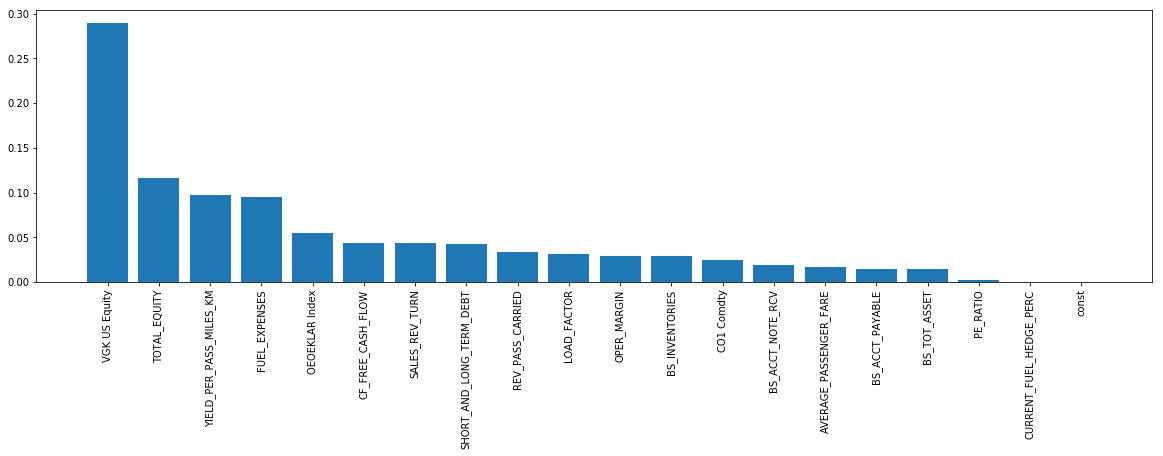

In [26]:
def map_importance(model):

    # Exrtract features importance with built-in function of random forest regressor
    features_importances = model.feature_importances_

    # Sort the index that will be our reference for the positino of each index regarding there importances
    sorted_index = np.argsort(features_importances)[::-1]

    # Create the corresponding labels to importances position
    features_count = range(len(features_importances))
    labels = np.array(linear_features.columns.to_list())[sorted_index]

    # Plot the graph
    plt.bar(features_count, features_importances[sorted_index], tick_label=labels)
    plt.xticks(rotation=90)
    plt.show()

map_importance(rfr)

__Let's play with parameter tuning using gridsearch cross validation__

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler

def rfr_model(X, Y):
    # Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(2,5),
            'n_estimators': (10, 50, 100, 200, 400, 600),},
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, Y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
    # Perform K-Fold CV
    scores = cross_val_score(rfr, X, Y, cv=10, scoring='neg_mean_absolute_error')

    return scores

rfr_model(X,Y)

c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
c:\users\lucas\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\users\lucas\appdata\local\program

array([ -0.27845692,  -1.72845771,  -1.7595469 ,  -2.54727629,
        -1.64305418,  -2.16199437,  -2.06271059,  -2.2370175 ,
       -24.89848139, -22.92693631])

In [28]:
scores = cross_val_score(rfr, x, y.values.ravel(), cv=10, scoring='neg_mean_absolute_error')

In [29]:
predictions = cross_val_predict(rfr, x, y.values.ravel(), cv=10)

Mean Y:  -0.4437
Mean predictions:  -1.0093
Score of model in sample: 0.7611
Score of model out-of-sample: -13.3382


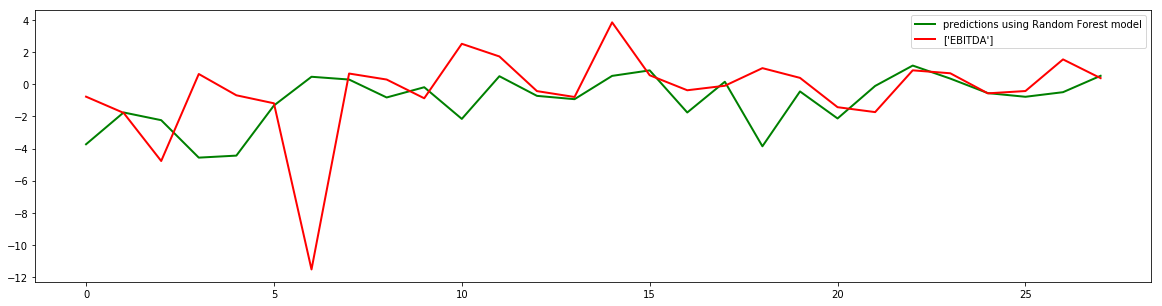

In [30]:
def vizualize_model(model, test_targets):
    predictions = cross_val_predict(model, x, y.values.ravel(), cv=10)
    scores = cross_val_score(model, x, y.values.ravel(), cv=10, scoring='neg_mean_absolute_error')
    y_variables = y.values.tolist()
    
    plt.plot(predictions, 'g', y_variables, 'r')
    labels = ['predictions using Random Forest model', y_names]
    plt.legend(labels)
    
    #Print results & comments
    print('Mean Y: ', np.mean(y_variables).round(4))
    print('Mean predictions: ', np.mean(predictions).round(4))
    print('Score of model in sample:', model.score(X, Y).round(4))
    print('Score of model out-of-sample:',model.score(x, y).round(4))

vizualize_model(rfr, y)

__Gradient Boosting Regressor:__

https://campus.datacamp.com/courses/machine-learning-for-finance-in-python/machine-learning-tree-methods?ex=13

In [31]:
from sklearn.ensemble import GradientBoostingRegressor

gsc = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid={
        'max_depth': range(2,4),
        'n_estimators': (200, 400, 600),#, 200, 400, 600),
        'learning_rate': (0.2, 0.1, 0.05, 0.04, 0.03, 0.02, 0.01, 0.005),
        'subsample': (0.3, 0.4, 0.5,0.6, 0.7),
        'min_samples_split': (5, 4, 3, 2),
        'random_state': (80, 70, 60, 50, 40),
        'loss': ('ls', 'huber', 'quantile', 'lad')},
    cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

grid_result = gsc.fit(X, Y)
best_params = grid_result.best_params_

gbr = GradientBoostingRegressor(max_depth         = best_params["max_depth"],
                                n_estimators      = best_params["n_estimators"],
                                learning_rate     = best_params["learning_rate"],
                                subsample         = best_params["subsample"],
                                min_samples_split = best_params["min_samples_split"],
                                random_state      = best_params["random_state"],
                                loss              = best_params["loss"],
                                verbose=False)

scores = cross_val_score(gbr, X, y, cv=10, scoring='neg_mean_absolute_error')

# Perform K-Fold CV
gbr.fit(X,Y)

print(gbr.score(X, Y))
print(gbr.score(x, y))

KeyboardInterrupt: 

In [ ]:
grid_result.cv_results_

In [ ]:
gbr = GradientBoostingRegressor(
    loss='ls',
    learning_rate=0.01,
    n_estimators=400,
    subsample=0.6,
    criterion='friedman_mse',
    min_samples_split=5,
    min_samples_leaf=4,
    min_weight_fraction_leaf=0.,
    max_depth=3,
    min_impurity_decrease=0.1,
    min_impurity_split=None,
    init=None,
    random_state=60,
    max_features=20,
    alpha=0.8,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    presort='auto',
    validation_fraction=0.01,
    n_iter_no_change=None,
    tol=0.001)

gbr.fit(X,Y)
print(gbr.score(X, Y))
print(gbr.score(x, y))

In [ ]:
map_importance(gbr)

In [ ]:
vizualize_model(gbr, y)